<center> <h1> FIR </h1> </center>

Como la la longitud de un filtro debe ser finita. No podemos usar muestras infinitas en un sistema real. Surgen 2 tipos de filtros:
* Finite Impulse Reponse (FIR) filters.
* Infinite Impulse Reponse (IIR) filters.


![18_1.PNG](18_1.PNG)
![18_2.PNG](18_2.PNG)
![18_3.PNG](18_3.PNG)
![18_4.PNG](18_4.PNG)

### En los filtros FIR siempre es un filtro estable. Ya que todos los polos estan ubicados en (0,0). Para esto hay que sacar el $$ z^{-n} $$ 

Si la respuesta al impulso del filtro FIR tiene simetria PAR o simeteria IMPAR tiene fase lineal. Siendo N el orden del filtro FIR implementado.
![18_5.PNG](18_5.PNG)

### Tipos de simetria
![18_6.PNG](18_6.PNG)

### Restricciones Filtros FIR de fase lineal por simetria
Retardo de grupo: $$ D =  \frac{N-1}{2}$$ 

* Filtro FIR Tipo I (Simetria Par Numero Impar de coeficientes)
    * No tienen restricciones. Son los mas ampliamente utilizados.
* Filtro FIR Tipo II (Simetria Par Numero Par de coeficientes)
    * Zero en la frecuencia de Nyquist. No pueden ser utilizados en filtos rechaza banda o pasa altoss.
* Filtro FIR Tipo III (Simetria Impar Numero Impar de coeficientes)
    * Zero en la frecuencia de Nyquist y en DC. No pueden utilizarse como rechaza banda, pasa altos o pasa bajo.  Se pueden utilizar como transformadores de Hilbert pero van a a tener mala transferencia de magnitud en DC y FS/2.  Tienen un shift de fase 90°.
* Filtro FIR Tipo IV (Simetria Impar Numero Par de coeficientes)   
    * Zero en DC. No puede ser utilizado como un filtro pasabajo. Son adecuados para utilizarse como diferenciadores de Hilbert. Su respuesta en magnitud es mejor por no tener un zero en la frecuencia de Nyquist. enen un shift de fase 90°.
    
 #### Para algunos casos conviene tener retardo de grupo entero con lo cual los que cumpliria los filtro tipo I y tipo III 
 
 
![19_4.PNG](19_4.PNG)
  

In [3]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import scipy.io as sio
import scipy.fftpack as sc

In [4]:
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [5]:
def plot_freq_reponse(w,h):
    fig,ax1 = plt.subplots(figsize=(10,6))
    #Magnitud
    ax1.set_title('Digital Filter Frecuency response')
    ax1.plot(w, (abs(h)), 'b')
    ax1.set_ylabel('Amplitude', color='b')
    ax1.set_xlabel('Frequency [rad/sample]')
    #Fase
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax1.grid()
    #ax2.grid()
    ax1.axis('tight')
    fig.show()

### Ejemplo Filtro FIR Tipo I (Promediador Orden 5)
Observemos que este filtro tiene simetria PAR en h(2). Y un numero impar de coeficientes.
$$ y(n) = \frac{x(n) + x(n-1) + x(n-2) + x(n-3) + x(n-4)}{5} $$

Ceros del numerador=[ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]


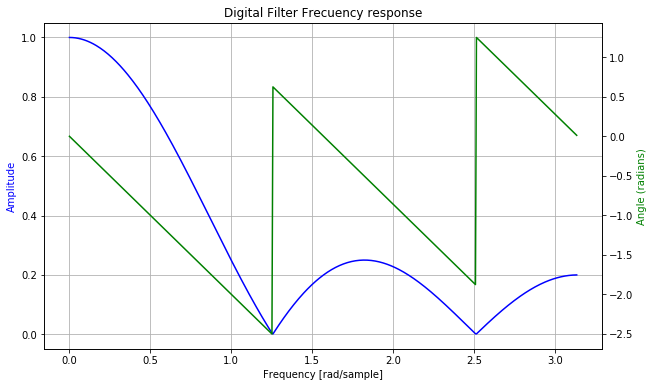

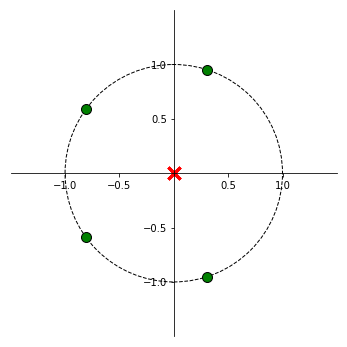

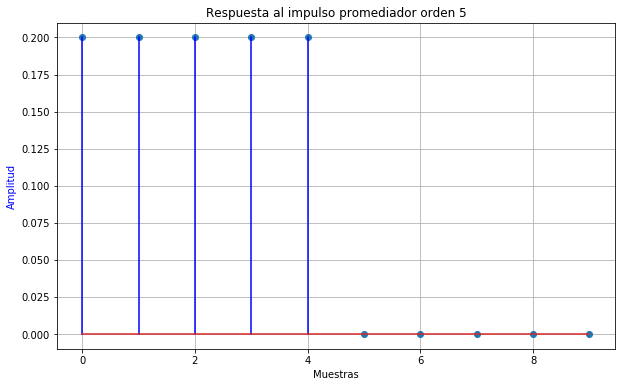

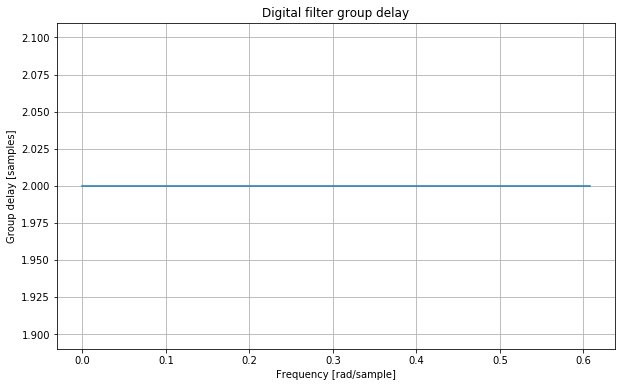

In [29]:
fs = 1.
#N = 5 Filtro promediador
N = 5
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)
#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

plot_freq_reponse(w,h)
print("Ceros del numerador={}".format(np.roots(b)))

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=512)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout[0:10], np.squeeze(yout)[0:10], 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()

# Calculo del retardo de grupo
# https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.group_delay.html
w, gd = signal.group_delay((b, 1.))

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot(w[0:100], gd[0:100])
#axes.set_xlim([0,0.1])
#axes.set_ylim([0,10])

ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()

### Ejemplo Filtro FIR Tipo II (Promediador Orden 4)
Observemos que este filtro tiene simetria PAR en h(1.5). Y un numero impar de coeficientes.
$$ y(n) = \frac{x(n) + x(n-1) + x(n-2) + x(n-3)}{4} $$

Ceros del numerador=[-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]


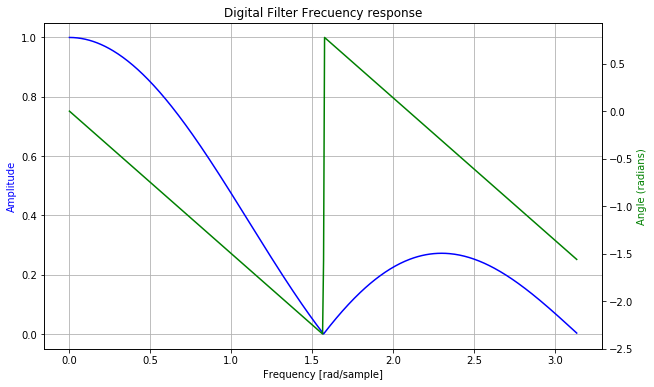

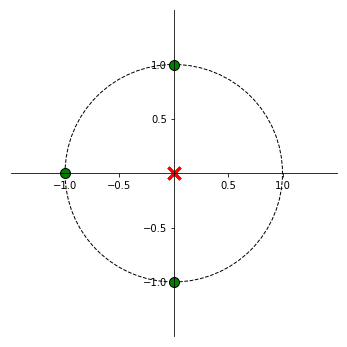

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:633: UserWarning: The group delay is singular at frequencies [1.571], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))


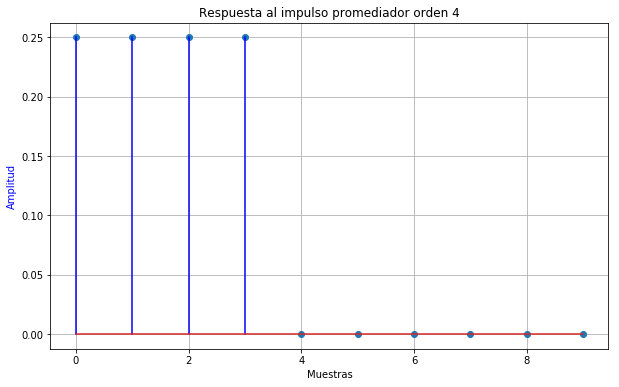

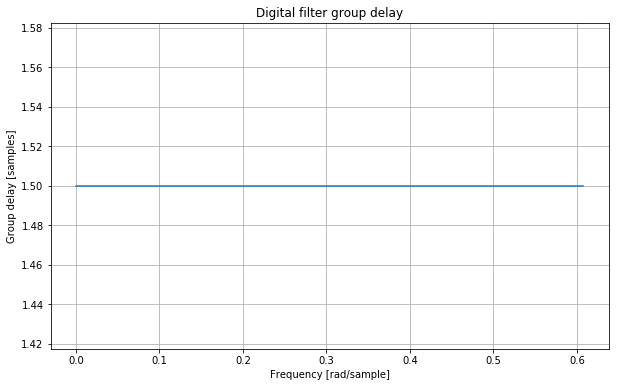

In [31]:
fs = 1.
#N = 4  Filtro promediador
N = 4
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)
#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

plot_freq_reponse(w,h)
print("Ceros del numerador={}".format(np.roots(b)))

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=512)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout[0:10], np.squeeze(yout)[0:10], 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()

# Calculo del retardo de grupo
# https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.group_delay.html
w, gd = signal.group_delay((b, 1.))

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot(w[0:100], gd[0:100])
#axes.set_xlim([0,0.1])
#axes.set_ylim([0,10])

ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()

### Ejemplo Filtro FIR Tipo III (Orden 5)
Observemos que este filtro tiene simetria PAR en h(2). Y un numero impar de coeficientes.
$$ y(n) = x(n) + x(n-1) -x(n-3) -x(n-4) $$

Ceros del numerador=[ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j -1. +0.j       ]


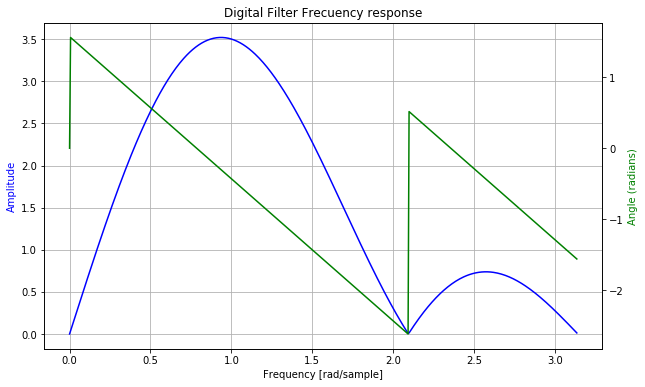

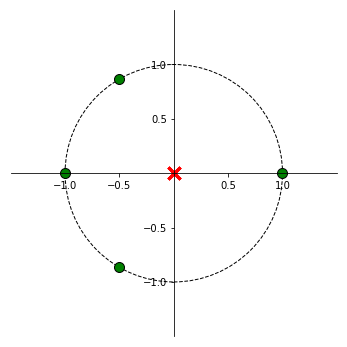

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:633: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))


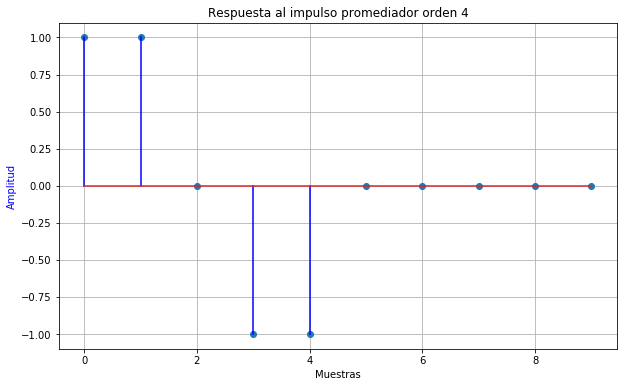

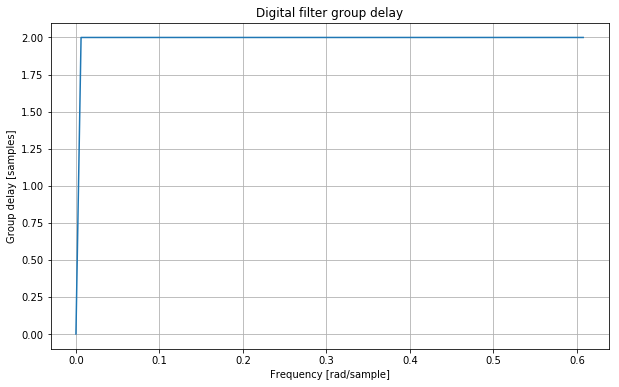

In [33]:
b = [1.,1.,0.,-1.,-1.]
a = [1.,0.,0.,0.,0.]

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

plot_freq_reponse(w,h)
print("Ceros del numerador={}".format(np.roots(b)))

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=512)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout[0:10], np.squeeze(yout)[0:10], 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()

# Calculo del retardo de grupo
# https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.group_delay.html
w, gd = signal.group_delay((b, 1.))

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot(w[0:100], gd[0:100])
#axes.set_xlim([0,0.1])
#axes.set_ylim([0,10])

ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()

### Ejemplo Filtro FIR Tipo III (Orden 6)
Observemos que este filtro tiene simetria PAR en h(2.5). Y un numero impar de coeficientes.
$$ y(n) = x(n) + x(n-1) + x(n-2) -x(n-3) -x(n-4) -x(n-5) $$

Ceros del numerador=[ 1.        +0.j         -0.50000001+0.86602541j -0.50000001-0.86602541j
 -0.49999999+0.8660254j  -0.49999999-0.8660254j ]


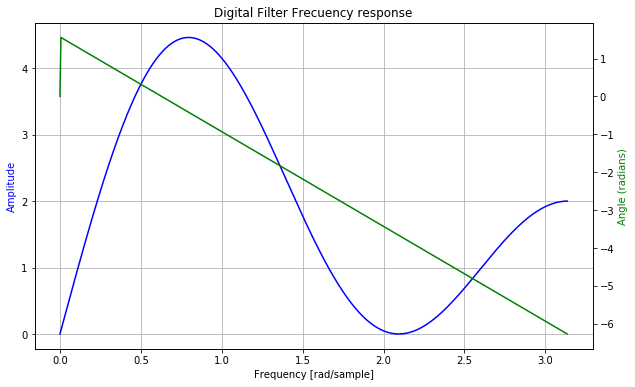

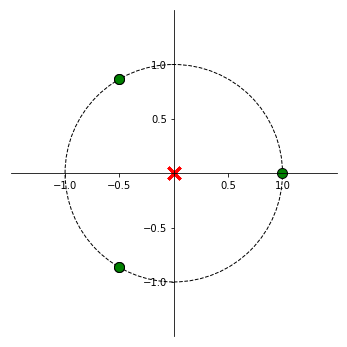

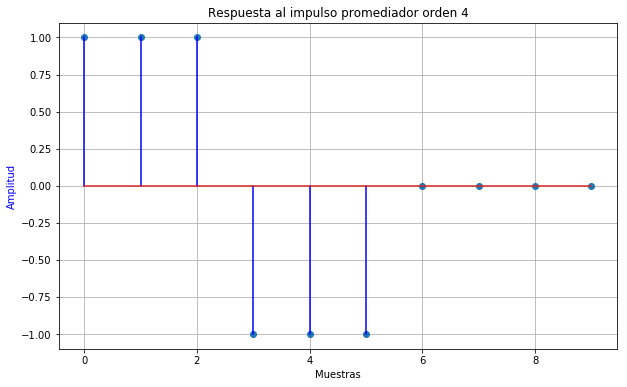

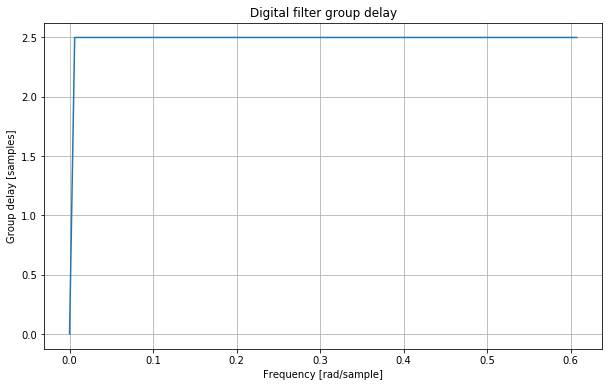

In [36]:
b = [1.,1.,1.,-1.,-1.,-1.]
a = [1.,0.,0.,0.,0.,0.]

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

plot_freq_reponse(w,h)
print("Ceros del numerador={}".format(np.roots(b)))

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=512)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout[0:10], np.squeeze(yout)[0:10], 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()

# Calculo del retardo de grupo
# https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.group_delay.html
w, gd = signal.group_delay((b, 1.))

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot(w[0:100], gd[0:100])
#axes.set_xlim([0,0.1])
#axes.set_ylim([0,10])

ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()